# Estadística Aplicada
## Karen Lorelei Cerda Roiz
### 8va Sesión 23 de febrero del 2023

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from lifelines.datasets import load_rossi 
rossi = load_rossi()

In [5]:
rossi.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


### Exponencial

In [6]:
from lifelines import ExponentialFitter

In [8]:
ex1 = ExponentialFitter().fit(rossi['week'], rossi['arrest'])

(0.0, 0.1)

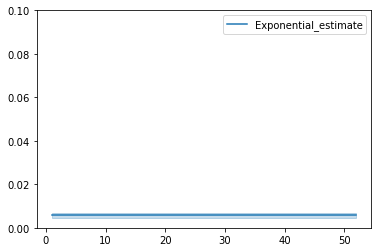

In [16]:
ex1.plot_hazard();
plt.ylim (0 , 0.1)

In [11]:
ex1.hazard_

,Exponential_estimate
1.000000,0.005755
1.118329,0.005755
1.236659,0.005755
1.354988,0.005755
1.473318,0.005755
...,...
51.526682,0.005755
51.645012,0.005755
51.763341,0.005755
51.881671,0.005755


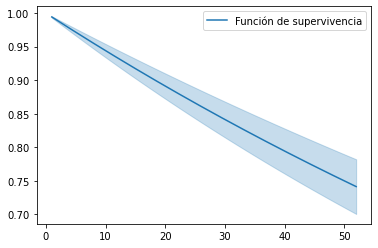

In [25]:
ex1.plot_survival_function(label= 'Función de supervivencia');

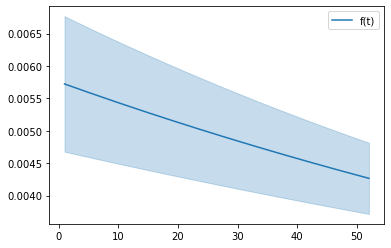

In [26]:
ex1.plot_density(label ='f(t)');

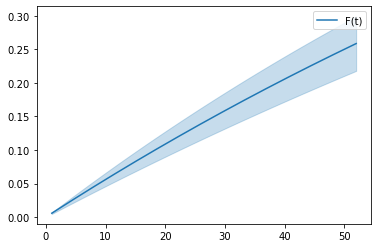

In [27]:
ex1.plot_cumulative_density(label = 'F(t)');

In [51]:
ex1.median_survival_time_

120.44346091357195

### Weibull

In [12]:
from lifelines import WeibullFitter

In [14]:
weib1 = WeibullFitter().fit(rossi['week'], rossi['arrest'])

<AxesSubplot:>

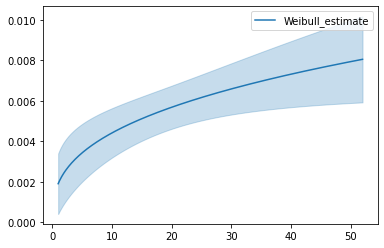

In [15]:
weib1.plot_hazard()

In [17]:
weib1.hazard_

,Weibull_estimate
1.000000,0.001901
1.118329,0.001980
1.236659,0.002054
1.354988,0.002124
1.473318,0.002190
...,...
51.526682,0.008018
51.645012,0.008024
51.763341,0.008031
51.881671,0.008038


In [18]:
#Riesgo de que te arresten a la primer semana
weib1.hazard_at_times(1.0)

1.0    0.001901
Name: Weibull_estimate, dtype: float64

In [19]:
#Riesgo de que te arresten a la cuarta semana
weib1.hazard_at_times(4.0)

4.0    0.003153
Name: Weibull_estimate, dtype: float64

In [20]:
#Riesgo de que te arresten a los 6 meses
weib1.hazard_at_times(24.0)

24.0    0.006066
Name: Weibull_estimate, dtype: float64

In [21]:
#Riesgo de que te arresten al año
weib1.hazard_at_times(52.0)

52.0    0.008044
Name: Weibull_estimate, dtype: float64

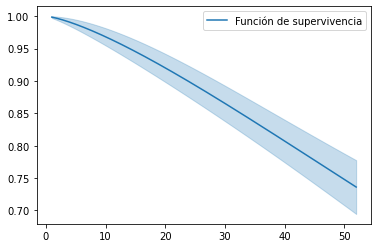

In [33]:
weib1.plot_survival_function(label= 'Función de supervivencia');

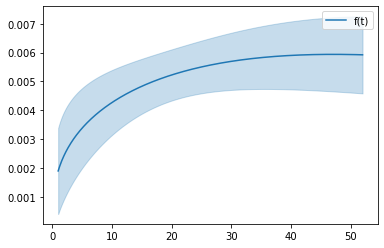

In [40]:
weib1.plot_density(label ='f(t)');

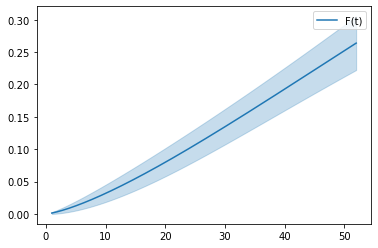

In [41]:
weib1.plot_cumulative_density(label = 'F(t)');

In [50]:
weib1.median_survival_time_

94.5561872278691

### Logaritmo Natural

In [22]:
from lifelines import LogNormalFitter

In [23]:
logn1 = LogNormalFitter().fit(rossi['week'], rossi['arrest'])

<AxesSubplot:>

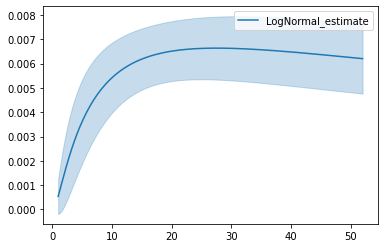

In [24]:
logn1.plot_hazard()

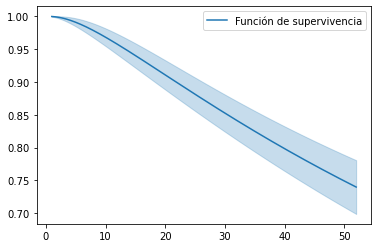

In [43]:
logn1.plot_survival_function(label= 'Función de supervivencia');

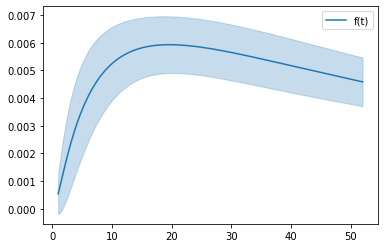

In [44]:
logn1.plot_density(label ='f(t)');

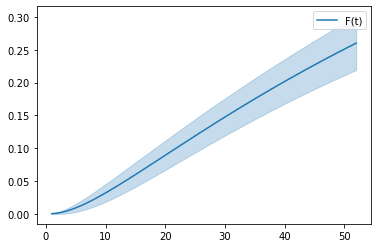

In [46]:
logn1.plot_cumulative_density(label = 'F(t)');

In [49]:
logn1.median_survival_time_

124.59531642094827

### Para comparar y elegir el mejor modelo se suele usar el criterio de Akaike(AIC) 

El criterio de Akaike (AIC) se calcula:

$AIC = -2LogL + 2k $

donde k es el número de parámetros a estimar.

Se considera que el modelo con el **menor valor en el AIC** es **el mejor modelo**.

In [48]:
ex1.AIC_.round(), weib1.AIC_.round(), logn1.AIC_.round()

(1406.0, 1397.0, 1400.0)

El modelo con el menor criterio de Akaike (AIC) es el Weibull, por lo tanto, podemos concluir que el tiempo de supervivencia (liberado - arrestado) sigue una distribución de Weibull. 

La mediana es de 94, lo cual significa que el 50% de los individuos ya había sido arrestado en la semana 94.